In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Keep only petal length and petal width for clustering
df = df[['petal length (cm)', 'petal width (cm)']]

In [11]:
# Scale the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [5]:
# lets assume k=3 is the optimal value
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

c:\Users\Awerty\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Awerty\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


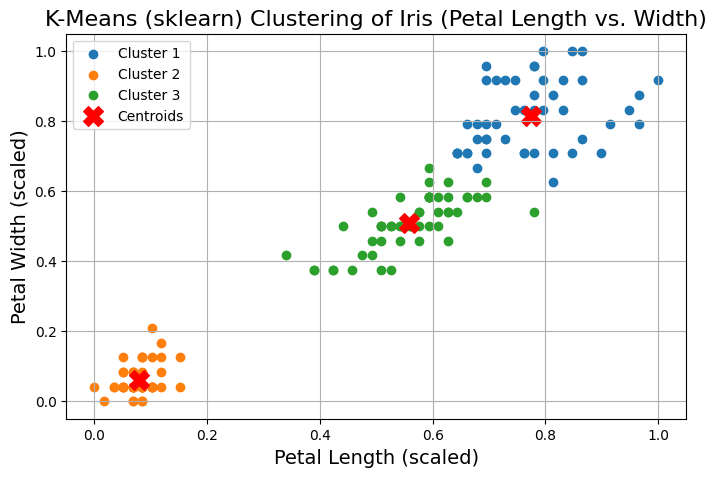

In [6]:
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    plt.scatter(
        df_scaled[clusters == cluster, 0],
        df_scaled[clusters == cluster, 1],
        label=f'Cluster {cluster + 1}'
    )


# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means (sklearn) Clustering of Iris (Petal Length vs. Width)', fontsize=16)
plt.xlabel('Petal Length (scaled)', fontsize=14)
plt.ylabel('Petal Width (scaled)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

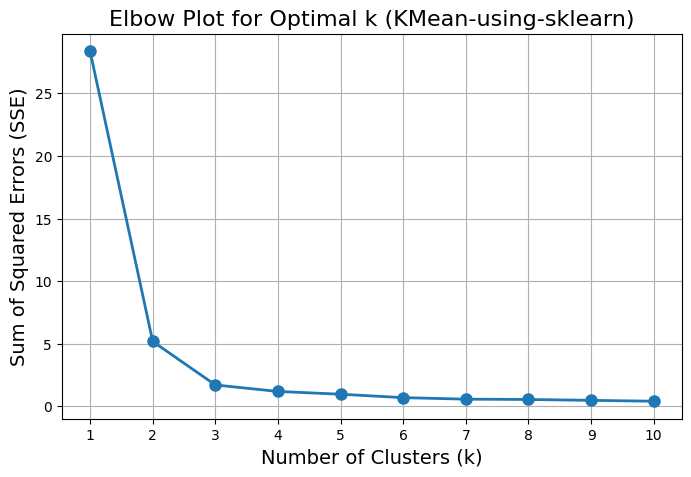

In [7]:
# Elbow graph to determine optimal k
sse = [] 
k_values = range(1, 11)
 

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    sse.append(km.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o',linewidth=2, markersize=8)
plt.title('Elbow Plot for Optimal k (KMean-using-sklearn)',fontsize=16)
plt.xlabel('Number of Clusters (k)',fontsize=14)
plt.ylabel('Sum of Squared Errors (SSE)',fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()